In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

##### Read features as dataframes

In [3]:
year_name = [f'{i}_{i+2}' for i in range(1990,2020,3)]

In [4]:
feature_df = [pd.read_csv(f'./Data/Pt_{year}.csv') for year in year_name]
feature_df = [fe.drop(['system:index','.geo'],axis=1) for fe in feature_df]

##### train_test_split and apply randomforest_classifier

In [12]:
sfs_df_list = []

for year,df in zip(year_name,feature_df):
    
    X = df.drop(['Built'],axis=1)
    y = df['Built']
    
    sfs = SFS(RandomForestClassifier(n_jobs=-1,
                                     n_estimators=50),
                                     k_features=20,
                                     forward=True,
                                     floating=False,
                                     verbose=2,
                                     scoring='accuracy',
                                     cv=4,
                                     n_jobs=-1).fit(X,y)
    
    sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
    sfs_df['year'] = [year] * len(sfs_df)
    
    sfs_df_list.append(sfs_df)
    
    print(f'Search SFS for {year} completed!')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   11.6s finished

[2020-07-28 22:09:26] Features: 1/20 -- score: 0.7491548570350516[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   14.9s finished

[2020-07-28 22:09:41] Features: 2/20 -- score: 0.8098927574728827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   13.3s finished

[2020-07-28 22:09:54] Features: 3/20 -- score: 0.879398443858172[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  40 out of

Search SFS for 1990_1992 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   12.4s finished

[2020-07-28 22:15:19] Features: 1/20 -- score: 0.7531634375410812[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   15.2s finished

[2020-07-28 22:15:34] Features: 2/20 -- score: 0.805509428973119[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   14.6s finished

[2020-07-28 22:15:49] Features: 3/20 -- score: 0.8768946255053924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.5s finished

[2020-07-28 22:16:07] Features: 4/20 -- sc

Search SFS for 1993_1995 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   12.1s finished

[2020-07-28 22:21:18] Features: 1/20 -- score: 0.7273643431078483[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.6s finished

[2020-07-28 22:21:30] Features: 2/20 -- score: 0.7793373426873776[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   14.1s finished

[2020-07-28 22:21:45] Features: 3/20 -- score: 0.8379463609241518[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   16.8s finished

[2020-07-28 22:22:01] Features: 4/20 -- s

Search SFS for 1996_1998 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   12.3s finished

[2020-07-28 22:27:00] Features: 1/20 -- score: 0.7416408932035328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.9s finished

[2020-07-28 22:27:13] Features: 2/20 -- score: 0.7987473444635892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   13.8s finished

[2020-07-28 22:27:27] Features: 3/20 -- score: 0.84370713133829[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.4s finished

[2020-07-28 22:27:44] Features: 4/20 -- sco

Search SFS for 1999_2001 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   11.8s finished

[2020-07-28 22:32:37] Features: 1/20 -- score: 0.7271137166671852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.4s finished

[2020-07-28 22:32:50] Features: 2/20 -- score: 0.7877273073939566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   12.5s finished

[2020-07-28 22:33:03] Features: 3/20 -- score: 0.8269258848192127[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   15.3s finished

[2020-07-28 22:33:18] Features: 4/20 -- s

Search SFS for 2002_2004 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   12.0s finished

[2020-07-28 22:38:28] Features: 1/20 -- score: 0.7249827020089252[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.5s finished

[2020-07-28 22:38:41] Features: 2/20 -- score: 0.7675635447158714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   12.7s finished

[2020-07-28 22:38:53] Features: 3/20 -- score: 0.8058886300392473[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   16.9s finished

[2020-07-28 22:39:10] Features: 4/20 -- s

Search SFS for 2005_2007 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   12.0s finished

[2020-07-28 22:44:04] Features: 1/20 -- score: 0.7323739868319513[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.6s finished

[2020-07-28 22:44:17] Features: 2/20 -- score: 0.7876025586475908[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   13.2s finished

[2020-07-28 22:44:30] Features: 3/20 -- score: 0.8507210966750727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.4s finished

[2020-07-28 22:44:48] Features: 4/20 -- s

Search SFS for 2008_2010 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.7s finished

[2020-07-28 22:49:44] Features: 1/20 -- score: 0.7446451490863549[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   13.5s finished

[2020-07-28 22:49:57] Features: 2/20 -- score: 0.7673146116971048[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   14.6s finished

[2020-07-28 22:50:12] Features: 3/20 -- score: 0.8204169982428553[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   18.8s finished

[2020-07-28 22:50:31] Features: 4/20 -- s

Search SFS for 2011_2013 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   13.1s finished

[2020-07-28 22:55:54] Features: 1/20 -- score: 0.7304953547555803[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   13.8s finished

[2020-07-28 22:56:08] Features: 2/20 -- score: 0.7730749430759365[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.0s finished

[2020-07-28 22:56:22] Features: 3/20 -- score: 0.8221663030618072[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   17.6s finished

[2020-07-28 22:56:40] Features: 4/20 -- s

Search SFS for 2014_2016 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   12.3s finished

[2020-07-28 23:02:03] Features: 1/20 -- score: 0.8042583665076775[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   12.6s finished

[2020-07-28 23:02:15] Features: 2/20 -- score: 0.8231688088244591[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.8s finished

[2020-07-28 23:02:28] Features: 3/20 -- score: 0.8283033894529169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   16.5s finished

[2020-07-28 23:02:45] Features: 4/20 -- s

Search SFS for 2017_2019 completed!


[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   19.6s finished

[2020-07-28 23:07:52] Features: 20/20 -- score: 0.9262381799151633

In [5]:
# # concat all sfs_df into one df
# sfs_all = pd.concat(sfs_df_list,axis=0)
# sfs_all.reset_index(inplace=True)

# # save sfs_all 
# sfs_all.to_csv('./Result/SFS.csv',index=False)

# load sfs_all df
sfs_all = pd.read_csv('./Result/SFS.csv')
sfs_all['index'] = sfs_all['index'].astype('category')
sfs_all['year']  = sfs_all['year'].astype('category')

In [6]:
sfs_all.iloc[19]['feature_names']

"('B3', 'B4', 'B7', 'DEM', 'EVI_cos_3', 'EVI_sin_2', 'Mean_EVI', 'Mean_NDBI', 'NDBI_cos_3', 'NDBI_sin_2', 'NDBI_sin_3', 'NDVI_cos_3', 'SLOPE', 'lrad', 'prec', 'pres', 'shum', 'srad', 'temp', 'wind')"

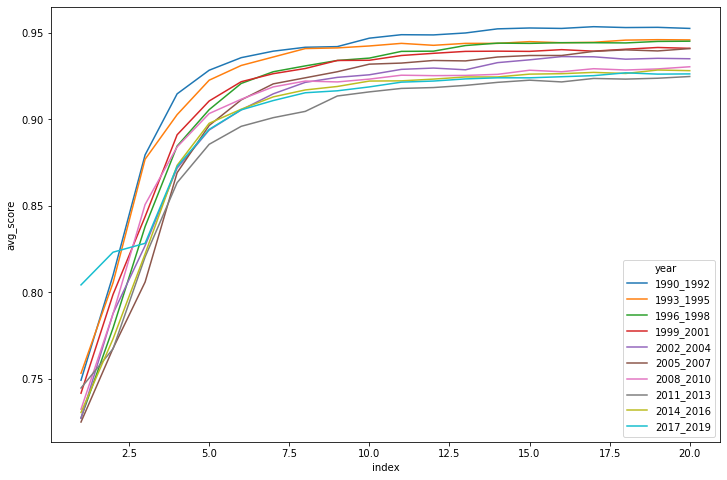

In [7]:
plt.figure(figsize=[12,8])
sns.lineplot(data = sfs_all,x='index',y = 'avg_score',hue='year')